In [14]:
import rasterio
import os

print("="*60)
print("NORMALIZATION TECHNIQUES RESEARCH")
print("="*60)

# Path to dataset - using allBands folder which contains all spectral bands
current_path = os.getcwd()
project_path = os.path.dirname(current_path)
dataset_analysis_path = os.path.join(project_path, "dataset", "allBands")

print(f"\nLooking for data in: {dataset_analysis_path}")

# Get class directories
classes = [d for d in os.listdir(dataset_analysis_path)
           if os.path.isdir(os.path.join(dataset_analysis_path, d))
           and not d.startswith('.')]

classes.sort()  # Sort alphabetically for consistency
print(f"Found classes: {classes}")
print(f"Total classes: {len(classes)}")

# Check what files are in the first class directory
class_path = os.path.join(dataset_analysis_path, classes[0])
all_files = os.listdir(class_path)

print(f"\nChecking '{classes[0]}' directory...")
print(f"Total files: {len(all_files)}")

# Check for different image formats
image_extensions = ['.tif', '.tiff', '.jpg', '.jpeg', '.png']
image_files = {}

for ext in image_extensions:
    files = [f for f in all_files if f.lower().endswith(ext)]
    if files:
        image_files[ext] = files
        print(f"Found {len(files)} {ext} files")

if not image_files:
    print("\n No image files found!")
    print(f"First 10 files in directory: {all_files[:10]}")
else:
    # Use the first available format
    ext = list(image_files.keys())[0]
    sample_files = image_files[ext]
    sample_image_path = os.path.join(class_path, sample_files[0])

    print(f"\nUsing sample image from class '{classes[0]}'")
    print(f"Sample file: {sample_files[0]}")

    with rasterio.open(sample_image_path) as src:
        print(f"\nImage metadata:")
        print(f"  Image shape: {src.shape} (height x width)")
        print(f"  Number of bands: {src.count}")
        print(f"  Data type: {src.dtypes[0]}")

        # Read all bands to understand the data
        print(f"\nAnalyzing all {src.count} bands:")
        for i in range(1, min(src.count + 1, 14)):  # Sentinel-2 has 13 bands
            band = src.read(i)
            print(f"  Band {i}: Min={band.min()}, Max={band.max()}, Mean={band.mean():.2f}")

        # Use first band for normalization examples
        band = src.read(1)

        print(f"\n" + "="*60)
        print(f"NORMALIZATION COMPARISON (Band 1)")
        print("="*60)

        print(f"\nOriginal Data:")
        print(f"  Min: {band.min()}, Max: {band.max()}, Mean: {band.mean():.2f}, Std: {band.std():.2f}")

        # Method 1: Min-Max (0-1)
        norm_minmax = (band - band.min()) / (band.max() - band.min())
        print(f"\n1. Min-Max Normalization (0-1):")
        print(f"  Min: {norm_minmax.min():.4f}, Max: {norm_minmax.max():.4f}, Mean: {norm_minmax.mean():.4f}")
        print(f"  ✓ Scales to [0,1] range - good for neural networks")

        # Method 2: Divide by 10000 (Sentinel-2 standard)
        norm_10000 = band / 10000.0
        print(f"\n2. Divide by 10000 (Sentinel-2 standard):")
        print(f"  Min: {norm_10000.min():.4f}, Max: {norm_10000.max():.4f}, Mean: {norm_10000.mean():.4f}")
        print(f"  ✓ Preserves relative intensity - standard for Sentinel-2")

        # Method 3: Z-score
        norm_zscore = (band - band.mean()) / band.std()
        print(f"\n3. Z-score Standardization:")
        print(f"  Min: {norm_zscore.min():.4f}, Max: {norm_zscore.max():.4f}, Mean: {norm_zscore.mean():.4f}, Std: {norm_zscore.std():.4f}")
        print(f"  ✓ Centers data around 0 - good for some ML algorithms")

    print("\n" + "="*60)
    print(" RECOMMENDATION FOR MULTI-BAND SATELLITE IMAGERY:")
    print("="*60)
    print("For EuroSAT allBands (Sentinel-2 13-band) data:")
    print("  • Method 2 (divide by 10000) is RECOMMENDED")
    print("  • This is the standard preprocessing for Sentinel-2")
    print("  • Apply to ALL bands consistently")
    print("  • Preserves the physical meaning of reflectance values")
    print("  • Values represent actual surface reflectance (0-1 range)")
    print("\n  Note: All 13 bands should use the SAME normalization!")
    print("="*60)

NORMALIZATION TECHNIQUES RESEARCH

Looking for data in: /home/tea/study/da5/ki2/project/dataset/allBands
Found classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Total classes: 10

Checking 'AnnualCrop' directory...
Total files: 3000
Found 3000 .tif files

Using sample image from class 'AnnualCrop'
Sample file: AnnualCrop_1442.tif

Image metadata:
  Image shape: (64, 64) (height x width)
  Number of bands: 13
  Data type: uint16

Analyzing all 13 bands:
  Band 1: Min=1207, Max=1329, Mean=1250.97
  Band 2: Min=904, Max=1361, Mean=1030.90
  Band 3: Min=775, Max=1362, Mean=954.83
  Band 4: Min=510, Max=1607, Mean=809.33
  Band 5: Min=787, Max=1560, Mean=1038.77
  Band 6: Min=1740, Max=3909, Mean=2251.31
  Band 7: Min=2052, Max=5041, Mean=2916.57
  Band 8: Min=1880, Max=4784, Mean=2735.28
  Band 9: Min=421, Max=752, Mean=496.28
  Band 10: Min=8, Max=11, Mean=9.92
  Band 11: Min=1562, Max=2954, Me

Resizing Techniques
Research Questions:

Why do CNNs need fixed input sizes?
Our images are 64×64, common pretrained models need 224×224

Should you resize to 224×224?
What interpolation method? (NEAREST, BILINEAR, BICUBIC)


Does resizing lose information for satellite imagery?


RESIZING TECHNIQUES RESEARCH
Original image shape: (64, 64, 3)
Original size: 64×64
Target size: 224×224 (common for pretrained models)

📊 Saved: resize_comparison.png


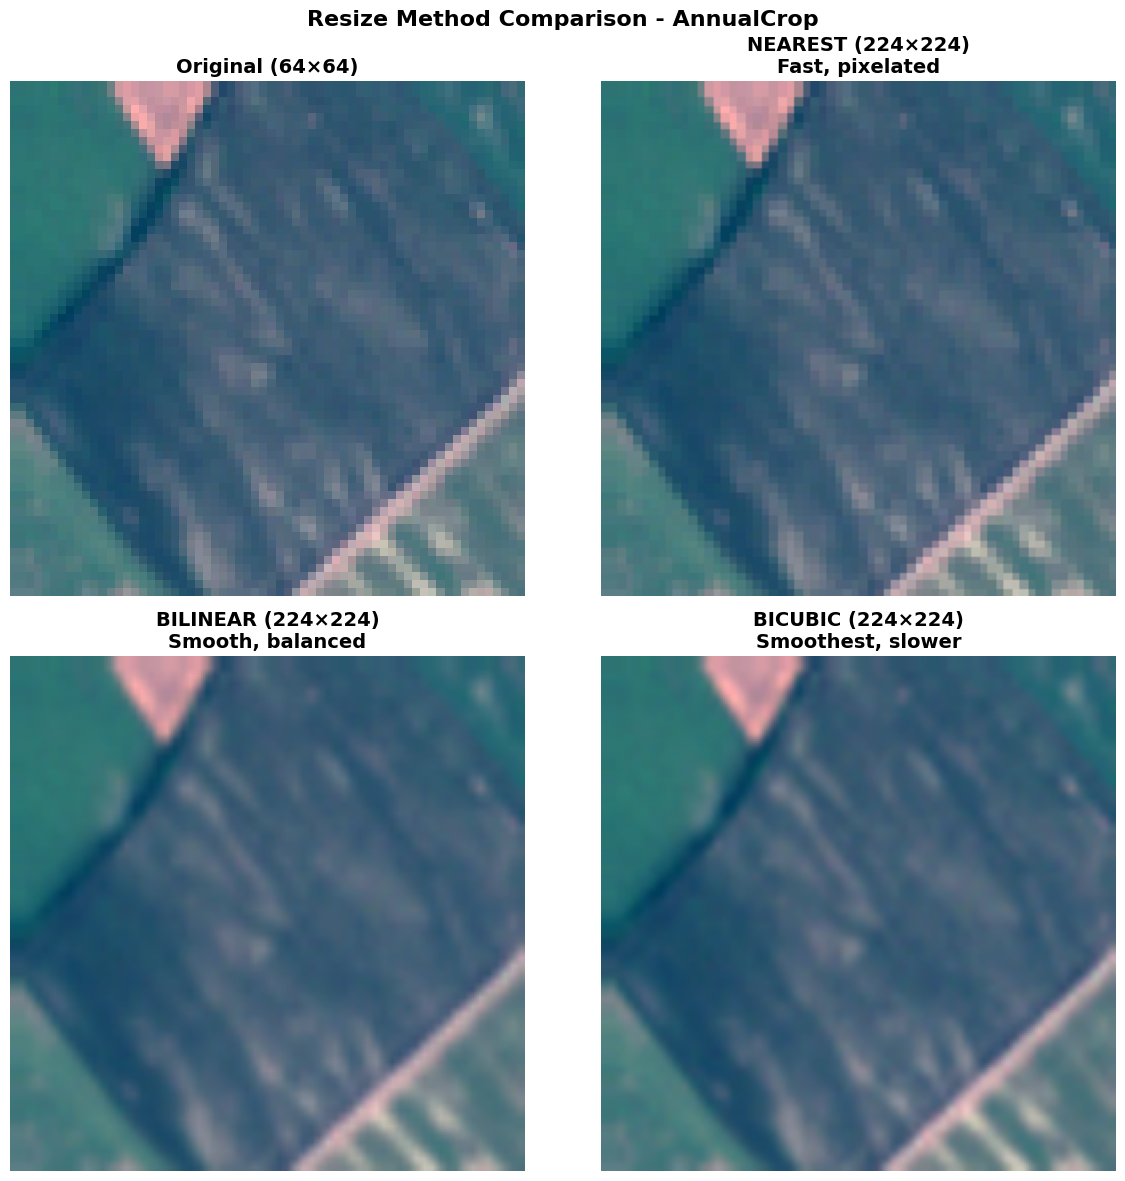


 RESIZE METHOD COMPARISON:
1. NEAREST (Nearest Neighbor):
   ✓ Fastest method
   ✓ Preserves original pixel values exactly
   ✗ Creates pixelated/blocky appearance
   • Use for: Speed priority, exact value preservation

2. BILINEAR:
   ✓ Good balance of speed and quality
   ✓ Smooth interpolation
   ✓ RECOMMENDED for most cases
   • Use for: General purpose satellite imagery

3. BICUBIC:
   ✓ Highest quality, smoothest results
   ✓ Best edge preservation
   ✗ Slower than bilinear
   • Use for: When quality is critical

 RECOMMENDATION FOR EUROSAT:
Use BILINEAR interpolation:
  • Best balance for satellite imagery
  • Smooth results without over-blurring
  • Fast enough for large datasets
  • Standard in deep learning pipelines

Implementation:
  from PIL import Image
  resized = Image.fromarray(image).resize((224, 224), Image.BILINEAR)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("\n" + "="*60)
print("RESIZING TECHNIQUES RESEARCH")
print("="*60)

with rasterio.open(sample_image_path) as src:
    # Read bands 4, 3, 2 for true color RGB (Red, Green, Blue for Sentinel-2)
    # Band 4 = Red, Band 3 = Green, Band 2 = Blue
    rgb = src.read([4, 3, 2])
    rgb = np.transpose(rgb, (1, 2, 0))

    # Normalize for visualization
    rgb_norm = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype(np.uint8)

    original = Image.fromarray(rgb_norm)

    print(f"Original image shape: {rgb.shape}")
    print(f"Original size: 64×64")
    print(f"Target size: 224×224 (common for pretrained models)")

    # Test different resize methods
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Original
    axes[0, 0].imshow(original)
    axes[0, 0].set_title(f"Original (64×64)", fontweight='bold', fontsize=14)
    axes[0, 0].axis('off')

    # Nearest neighbor (pixelated, preserves exact values)
    resized_nearest = original.resize((224, 224), Image.NEAREST)
    axes[0, 1].imshow(resized_nearest)
    axes[0, 1].set_title("NEAREST (224×224)\nFast, pixelated", fontweight='bold', fontsize=14)
    axes[0, 1].axis('off')

    # Bilinear (smooth, good balance)
    resized_bilinear = original.resize((224, 224), Image.BILINEAR)
    axes[1, 0].imshow(resized_bilinear)
    axes[1, 0].set_title("BILINEAR (224×224)\nSmooth, balanced", fontweight='bold', fontsize=14)
    axes[1, 0].axis('off')

    # Bicubic (smoother, slower)
    resized_bicubic = original.resize((224, 224), Image.BICUBIC)
    axes[1, 1].imshow(resized_bicubic)
    axes[1, 1].set_title("BICUBIC (224×224)\nSmoothest, slower", fontweight='bold', fontsize=14)
    axes[1, 1].axis('off')

    plt.suptitle(f"Resize Method Comparison - {classes[0]}", fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('resize_comparison.png', dpi=300, bbox_inches='tight')
    print("\n📊 Saved: resize_comparison.png")
    plt.show()

print("\n" + "="*60)
print(" RESIZE METHOD COMPARISON:")
print("="*60)
print("1. NEAREST (Nearest Neighbor):")
print("   ✓ Fastest method")
print("   ✓ Preserves original pixel values exactly")
print("   ✗ Creates pixelated/blocky appearance")
print("   • Use for: Speed priority, exact value preservation")

print("\n2. BILINEAR:")
print("   ✓ Good balance of speed and quality")
print("   ✓ Smooth interpolation")
print("   ✓ RECOMMENDED for most cases")
print("   • Use for: General purpose satellite imagery")

print("\n3. BICUBIC:")
print("   ✓ Highest quality, smoothest results")
print("   ✓ Best edge preservation")
print("   ✗ Slower than bilinear")
print("   • Use for: When quality is critical")

print("\n" + "="*60)
print(" RECOMMENDATION FOR EUROSAT:")
print("="*60)
print("Use BILINEAR interpolation:")
print("  • Best balance for satellite imagery")
print("  • Smooth results without over-blurring")
print("  • Fast enough for large datasets")
print("  • Standard in deep learning pipelines")
print("\nImplementation:")
print("  from PIL import Image")
print("  resized = Image.fromarray(image).resize((224, 224), Image.BILINEAR)")
print("="*60)

In [16]:
print("\n" + "="*60)
print("TRANSFER LEARNING PREPROCESSING")
print("="*60)

print("\n1. Band Selection for Transfer Learning:")
print("   • Pretrained models expect 3 channels (RGB)")
print("   • Our data has 13 bands")
print("   • Options:")
print("     a) Bands 2,3,4 (Blue, Green, Red - True Color)")
print("     b) Bands 4,3,2 (Red, Green, Blue - Natural order)")
print("     c) Bands 8,4,3 (NIR, Red, Green - False color vegetation)")
print("     d) Train from scratch using all 13 bands")
print("   • RECOMMENDED: Bands 4,3,2 (RGB) for best pretrained model compatibility")

print("\n2. ImageNet Normalization:")
print("   Mean: [0.485, 0.456, 0.406]")
print("   Std:  [0.229, 0.224, 0.225]")
print("   • These are ImageNet statistics (natural images)")
print("   • Question: Use ImageNet stats or compute Our own?")

# Compute Our dataset's mean and std
print("\n3. Computing Dataset Statistics:")
print("   (Sampling images to calculate mean/std per band)")
print("   Analyzing bands 4, 3, 2 (Red, Green, Blue)...")

means_per_band = []
stds_per_band = []

# Use bands 4, 3, 2 for RGB (Red, Green, Blue)
band_indices = [4, 3, 2]
band_names = ['Red (B4)', 'Green (B3)', 'Blue (B2)']

for idx, (band_idx, band_name) in enumerate(zip(band_indices, band_names)):
    band_values = []
    
    print(f"   Processing {band_name}...", end=' ')
    
    for cls in classes:
        cls_path = os.path.join(dataset_analysis_path, cls)
        images = [f for f in os.listdir(cls_path) if f.endswith('.tif')]
        
        # Sample 10 images per class (100 images total)
        for img in images[:10]:
            with rasterio.open(os.path.join(cls_path, img)) as src:
                band = src.read(band_idx)
                band_normalized = band / 10000.0  # Normalize first
                band_values.extend(band_normalized.flatten())
    
    means_per_band.append(np.mean(band_values))
    stds_per_band.append(np.std(band_values))
    print(f"Done")

print(f"\n   ✓ Analyzed {len(classes)} classes × 10 images = {len(classes) * 10} images")
print(f"   ✓ Total pixels analyzed: {len(classes) * 10 * 64 * 64:,}")

print("\n" + "="*60)
print("NORMALIZATION STATISTICS COMPARISON:")
print("="*60)

print(f"\n📊 ImageNet Statistics (Natural Images):")
print(f"   Mean: [0.485, 0.456, 0.406]")
print(f"   Std:  [0.229, 0.224, 0.225]")

print(f"\n📊 Our EuroSAT Statistics (Bands 4,3,2 - RGB):")
print(f"   Mean: [{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}]")
print(f"   Std:  [{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]")

print("\n" + "="*60)
print(" RECOMMENDATION:")
print("="*60)
print("Use Our DATASET STATISTICS for best results:")
print("  ✓ Satellite imagery is fundamentally different from ImageNet")
print("  ✓ Our data has different intensity distributions")
print("  ✓ Custom stats lead to better feature learning")
print("\nImplementation:")
print("  transform = transforms.Compose([")
print("      transforms.Resize((224, 224)),")
print(f"      transforms.Normalize(")
print(f"          mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}],")
print(f"          std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]")
print("      )")
print("  ])")

print("\n Alternative: Compare both approaches in Our experiments!")
print("   • Train one model with ImageNet normalization")
print("   • Train another with EuroSAT normalization")
print("   • Compare validation accuracy to see which works better")
print("="*60)


TRANSFER LEARNING PREPROCESSING

1. Band Selection for Transfer Learning:
   • Pretrained models expect 3 channels (RGB)
   • Our data has 13 bands
   • Options:
     a) Bands 2,3,4 (Blue, Green, Red - True Color)
     b) Bands 4,3,2 (Red, Green, Blue - Natural order)
     c) Bands 8,4,3 (NIR, Red, Green - False color vegetation)
     d) Train from scratch using all 13 bands
   • RECOMMENDED: Bands 4,3,2 (RGB) for best pretrained model compatibility

2. ImageNet Normalization:
   Mean: [0.485, 0.456, 0.406]
   Std:  [0.229, 0.224, 0.225]
   • These are ImageNet statistics (natural images)
   • Question: Use ImageNet stats or compute Our own?

3. Computing Dataset Statistics:
   (Sampling images to calculate mean/std per band)
   Analyzing bands 4, 3, 2 (Red, Green, Blue)...
   Processing Red (B4)... Done
   Processing Green (B3)... Done
   Processing Blue (B2)... Done

   ✓ Analyzed 10 classes × 10 images = 100 images
   ✓ Total pixels analyzed: 409,600

NORMALIZATION STATISTICS COMPA

In [17]:
print("\n" + "="*60)
print(" RECOMMENDED AUGMENTATION PIPELINE:")
print("="*60)

# Build the transform strings with actual values
train_transform_str = f"""
train_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation([0, 90, 180, 270]),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}],
        std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]
    )
])
"""

val_transform_str = f"""
val_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}],
        std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]
    )
])
"""

print(train_transform_str)
print(val_transform_str)

print("\n Key Principle: Augmentations should create realistic variations")
print("   that could actually occur in satellite imagery!")
print("="*60)


 RECOMMENDED AUGMENTATION PIPELINE:

train_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation([0, 90, 180, 270]),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.091, 0.103, 0.109],
        std=[0.059, 0.040, 0.033]
    )
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.091, 0.103, 0.109],
        std=[0.059, 0.040, 0.033]
    )
])


 Key Principle: Augmentations should create realistic variations
   that could actually occur in satellite imagery!


In [18]:
print("\n" + "="*60)
print("FINAL PREPROCESSING PIPELINE RECOMMENDATION")
print("="*60)

print("""
 COMPLETE PREPROCESSING PIPELINE FOR EUROSAT DATASET

1. DATA LOADING:
   ✓ Use rasterio to load multi-band TIFF files from dataset/allBands/
   ✓ Select bands for training:
     • RECOMMENDED: Use bands 4,3,2 (Red, Green, Blue) for RGB
     • Alternative: Use all 13 bands (requires custom model architecture)

2. NORMALIZATION:
   ✓ Divide by 10000.0 (Sentinel-2 standard)
   ✓ This converts raw values to reflectance (0-1 range)
   ✓ Apply to ALL bands consistently

3. RESIZING (for transfer learning to 224×224):
   ✓ Use BILINEAR interpolation (best balance)
   ✓ Alternative: BICUBIC for highest quality
   ✓ Resize from 64×64 to 224×224 for pretrained models

4. DATA AUGMENTATION (training only):
   ✓ RandomRotation([0, 90, 180, 270]) - satellite views have no orientation
   ✓ RandomHorizontalFlip(p=0.5)
   ✓ RandomVerticalFlip(p=0.5)
     Optional: ColorJitter(brightness=0.1, contrast=0.1) - use sparingly
    Avoid: Gaussian blur, hue/saturation changes

5. STANDARDIZATION:
   ✓ OPTION A: Use your dataset statistics (RECOMMENDED)
""")

print(f"       mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}]")
print(f"       std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]")

print("""
   ✓ OPTION B: Use ImageNet statistics (for comparison)
       mean=[0.485, 0.456, 0.406]
       std=[0.229, 0.224, 0.225]

6. TENSOR CONVERSION & BATCHING:
   ✓ Convert to PyTorch tensor with ToTensor()
   ✓ Use DataLoader with batch_size=32 (adjust based on GPU memory)
   ✓ Shuffle training data (shuffle=True)
   ✓ Don't shuffle validation/test data (shuffle=False)
   ✓ Use num_workers=4 for faster data loading
""")

print("\n" + "="*60)
print("💻 PYTORCH IMPLEMENTATION:")
print("="*60)

print("""
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import rasterio
from PIL import Image

# Custom Dataset Class
class EuroSATDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, classes, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for idx, cls in enumerate(classes):
            cls_path = os.path.join(root_dir, cls)
            files = [f for f in os.listdir(cls_path) if f.endswith('.tif')]
            self.images.extend([os.path.join(cls_path, f) for f in files])
            self.labels.extend([idx] * len(files))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]

        # Load image with rasterio
        with rasterio.open(img_path) as src:
            # Read RGB bands (4, 3, 2)
            img = src.read([4, 3, 2])
            img = np.transpose(img, (1, 2, 0))
            # Normalize to reflectance
            img = img / 10000.0
            # Convert to PIL for transforms
            img = Image.fromarray((img * 255).astype(np.uint8))

        if self.transform:
            img = self.transform(img)

        return img, label

# Training Transform""")

print(f"""
train_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation([0, 90, 180, 270]),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}],
        std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]
    )
])
""")

print(f"""
# Validation/Test Transform (NO augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}],
        std=[{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]
    )
])

# Create datasets
train_dataset = EuroSATDataset(
    root_dir='dataset/allBands',
    classes={classes},
    transform=train_transform
)

val_dataset = EuroSATDataset(
    root_dir='dataset/allBands',
    classes={classes},
    transform=val_transform
)

# Create dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True  # Faster GPU transfer
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)
""".format(classes=str(classes)))

print("="*60)
print("📊 SUMMARY OF DECISIONS:")
print("="*60)
print("✓ Bands: 4,3,2 (RGB) for transfer learning compatibility")
print("✓ Normalization: Divide by 10000 (Sentinel-2 standard)")
print("✓ Resize: BILINEAR to 224×224")
print("✓ Augmentation: Rotation + Flips (geometrically valid)")
print(f"✓ Standardization: Dataset-specific statistics")
print(f"   Mean: [{means_per_band[0]:.3f}, {means_per_band[1]:.3f}, {means_per_band[2]:.3f}]")
print(f"   Std:  [{stds_per_band[0]:.3f}, {stds_per_band[1]:.3f}, {stds_per_band[2]:.3f}]")
print("="*60)

print("\n" + "="*60)
print(" PREPROCESSING RESEARCH COMPLETE!")
print("="*60)
print("\n Generated files:")
print("   • resize_comparison.png")
print("   • augmentation_techniques.png")
print("\n Next steps:")
print("   1. Implement the custom dataset class")
print("   2. Set up train/val/test splits")
print("   3. Load a pretrained model (ResNet, EfficientNet, etc.)")
print("   4. Start training with the preprocessing pipeline")
print("\n Pro tip: Start with a small subset to validate your pipeline")
print("   before training on the full dataset!")
print("="*60)


FINAL PREPROCESSING PIPELINE RECOMMENDATION

 COMPLETE PREPROCESSING PIPELINE FOR EUROSAT DATASET

1. DATA LOADING:
   ✓ Use rasterio to load multi-band TIFF files from dataset/allBands/
   ✓ Select bands for training:
     • RECOMMENDED: Use bands 4,3,2 (Red, Green, Blue) for RGB
     • Alternative: Use all 13 bands (requires custom model architecture)

2. NORMALIZATION:
   ✓ Divide by 10000.0 (Sentinel-2 standard)
   ✓ This converts raw values to reflectance (0-1 range)
   ✓ Apply to ALL bands consistently

3. RESIZING (for transfer learning to 224×224):
   ✓ Use BILINEAR interpolation (best balance)
   ✓ Alternative: BICUBIC for highest quality
   ✓ Resize from 64×64 to 224×224 for pretrained models

4. DATA AUGMENTATION (training only):
   ✓ RandomRotation([0, 90, 180, 270]) - satellite views have no orientation
   ✓ RandomHorizontalFlip(p=0.5)
   ✓ RandomVerticalFlip(p=0.5)
     Optional: ColorJitter(brightness=0.1, contrast=0.1) - use sparingly
    Avoid: Gaussian blur, hue/satu